In [1]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\Lidor\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
cust_df = pd.read_csv("customer_data.csv")
paymt_df = pd.read_csv("payment_data.csv")

In [5]:
cust_df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [6]:
cust_df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [7]:
print(cust_df.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [8]:
cust_df["label"].value_counts()

0    900
1    225
Name: label, dtype: int64

In [9]:
low_risk = cust_df[cust_df["label"] == 0]
high_risk = cust_df[cust_df["label"] == 1]
frac = len(high_risk) / float(len(low_risk))
frac

0.25

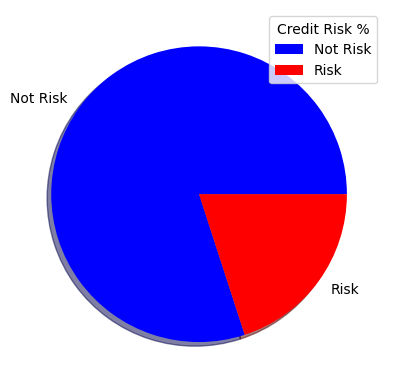

In [15]:
plt.pie(cust_df["label"].value_counts(), labels = ["Not Risk", "Risk"], colors = ["b", "r"], shadow = True)
plt.legend(title = "Credit Risk %")
plt.show() 

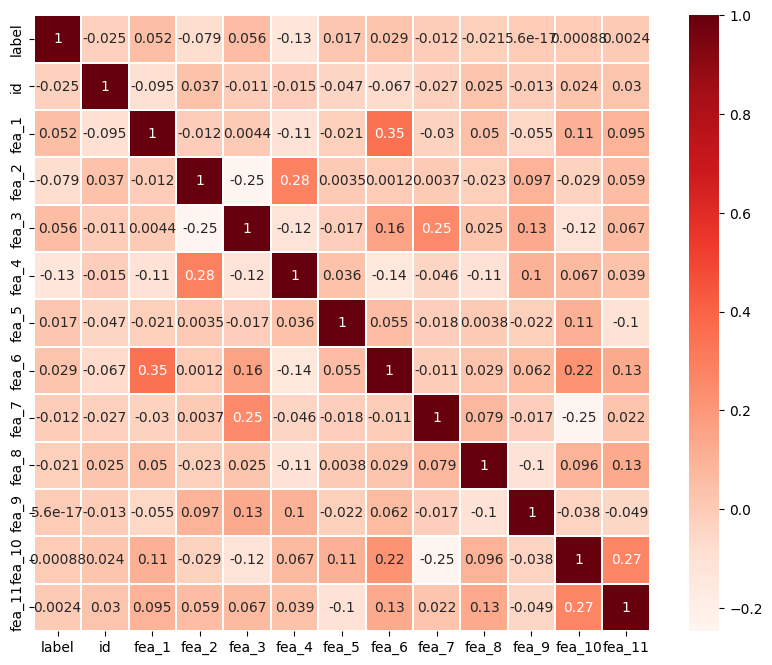

In [26]:
correlation_matrix = cust_df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, square = True, linewidths = 0.3, cmap = plt.cm.Reds)
plt.show()

In [27]:
y = cust_df["label"]
x = cust_df.copy()
x.drop(columns = ["label"], inplace = True)
x.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [28]:
# Handeling missing data (replace all missing values with mean value of that column)
x["fea_2"].fillna(x["fea_2"].mean(), inplace = True)
print(x.isnull().sum())
print(x.shape, y.shape)

id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64
(1125, 12) (1125,)


Balancing the dataset

In [35]:
ros =  RandomOverSampler(sampling_strategy = 0.7)
X_train_res, y_train_res = ros.fit_resample(x, y)
print(" New 'X' has", X_train_res.shape, "\n New 'Y' has", y_train_res.shape)
print('Original shape: {}'.format(Counter(y)))
print('Resampled shape: {}'.format(Counter(y_train_res)))

 New 'X' has (1530, 12) 
 New 'Y' has (1530,)
Original shape: Counter({0: 900, 1: 225})
Resampled shape: Counter({0: 900, 1: 630})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size = 0.7, test_size = 0.3, random_state = 1)

In [37]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [38]:
y_pred =forest_model.predict(X_test)
print(y_pred)

[0.05 0.52 0.18 0.8  0.99 0.28 0.56 0.03 0.46 0.19 0.99 0.42 0.95 0.66
 0.14 0.38 0.16 0.66 0.94 0.19 0.73 0.21 0.43 0.94 0.41 0.39 0.98 0.02
 0.82 0.79 0.92 0.93 0.33 0.1  0.96 0.98 0.19 0.32 0.9  0.22 0.14 0.92
 0.16 0.3  0.76 0.39 1.   0.16 0.12 0.23 0.32 0.37 0.2  0.09 0.74 0.62
 0.98 0.32 0.91 0.1  0.8  0.44 0.78 0.35 0.75 0.28 0.93 0.49 0.18 0.09
 0.4  0.63 0.43 0.3  0.3  0.05 0.97 0.27 0.15 0.98 0.41 0.9  0.7  0.45
 0.19 0.09 0.13 0.8  0.21 0.38 0.21 0.12 0.09 0.21 0.96 0.4  0.98 0.05
 0.69 0.24 0.96 0.33 0.37 0.09 0.66 0.97 0.99 0.18 0.94 0.38 0.67 0.86
 0.1  0.92 0.09 0.95 0.29 0.71 0.26 0.99 0.24 0.92 0.97 1.   0.12 0.1
 0.23 0.34 0.18 0.11 0.17 0.21 0.34 0.34 0.31 0.32 0.17 0.82 0.88 0.93
 0.42 0.13 0.16 0.81 0.28 0.14 0.25 0.88 0.91 0.06 0.73 0.44 0.23 0.94
 0.89 0.66 0.15 0.92 0.31 0.25 0.12 0.37 1.   0.14 0.17 0.2  0.38 0.28
 0.37 0.1  0.89 0.74 0.29 0.5  0.48 0.26 0.67 0.92 0.38 0.66 0.81 0.98
 0.96 0.97 1.   0.37 0.38 0.9  0.92 0.62 0.26 0.71 0.94 0.87 0.39 0.1
 0.1  0.

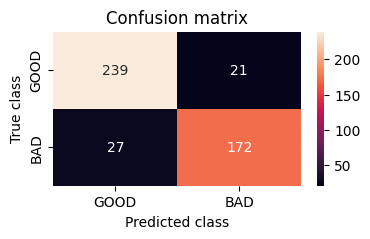

In [41]:
# Printing the confusion matrix of the result
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [43]:
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))

Random Forest: 452
0.8954248366013072
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       260
           1       0.89      0.86      0.88       199

    accuracy                           0.90       459
   macro avg       0.89      0.89      0.89       459
weighted avg       0.90      0.90      0.90       459



<Figure size 900x700 with 0 Axes>